# gdrive mount

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# data load

In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n',
      os.listdir(path + 'test'),'\n',
      os.listdir(path + '../metrics'),'\n',
      os.listdir(path + '../scripts'))

['train_payment.csv', 'train_trade.csv', 'train_pledge.csv', 'train_combat.csv', 'train_label.csv', 'train_activity.csv'] 
 ['test1_activity.csv', 'test1_combat.csv', 'test2_activity.csv', 'test1_pledge.csv', 'test2_combat.csv', 'test2_trade.csv', 'test1_trade.csv', 'test1_payment.csv', 'test2_payment.csv', 'test2_pledge.csv'] 
 ['score_function.py', '자체성능평가함수안내.pdf', 'score_function.r', '__pycache__', 'lhh_inference', 'bjw_inference', 'hh_inference', 'nes_inference', 'metrics_test_lhh.ipynb'] 
 ['explortary data', 'model', 'data merge']


In [0]:
train_label = pd.read_csv(path + 'train/train_label.csv')

train_activity = pd.read_csv(path + 'train/train_activity.csv')
train_payment = pd.read_csv(path + 'train/train_payment.csv')
train_trade = pd.read_csv(path + 'train/train_trade.csv')
train_pledge = pd.read_csv(path + 'train/train_pledge.csv')
train_combat = pd.read_csv(path + 'train/train_combat.csv')

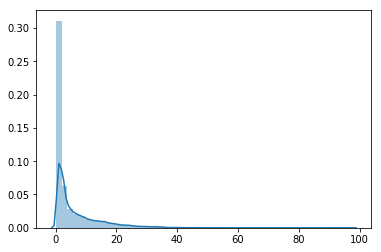

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train_label['amount_spent']*train_label['survival_time'])

## activity

In [0]:
train_activity['game_money_change'] = np.abs(train_activity['game_money_change'])
train_activity_group = train_activity.groupby('acc_id').agg({'day':'nunique', 
                                                             'char_id':'nunique', 
                                                             'server':'nunique', 
                                                             'playtime':'sum', 
                                                             'npc_kill':'sum', 
                                                             'solo_exp':'sum',
                                                             'party_exp':'sum', 
                                                             'quest_exp':'sum',
                                                             'rich_monster':'sum', 
                                                             'death':'sum', 
                                                             'revive':'sum',
                                                             'exp_recovery':'sum',
                                                             'fishing':'sum',
                                                             'private_shop':'sum',
                                                             'game_money_change':'sum',
                                                             'enchant_count':'sum'})

## payment

In [0]:
train_payment_group = train_payment.groupby('acc_id').agg({'day':'nunique',
                                                           'amount_spent':'sum'})

## trade

- 1주일 40회 이상 수수료 부과(2만, 2만 1천)

In [0]:
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,NaN
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,NaN
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,NaN
3,7,23:13:43,1,au,121622,49839,71226,281334,adena,9.587936e-03,NaN
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639


In [0]:
train_trade.groupby('target_acc_id')['type'].value_counts().unstack().dropna()

type,0,1
target_acc_id,,
8,2.0,8.0
17,39.0,18.0
19,2.0,21.0
20,36.0,9.0
21,20.0,6.0
22,18.0,11.0
26,5.0,23.0
31,3.0,2.0
33,12.0,1.0


## pledge


In [0]:
train_pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000


## combat

In [0]:
train_combat.head()

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,1,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1,13809,374964,ap,7,16,0.0,0.0,0.0,0.0,0.0,0.112612,0.098129
4,1,13809,117917,ap,2,11,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
